<a href="https://colab.research.google.com/github/ZenoZoldyck/Recurrent_Nets/blob/main/Google_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

tf.__version__

'2.5.0'

In [237]:
# load in the data

dataset = pd.read_csv("/content/GOOGL_2006-01-01_to_2018-01-01.csv")
dataset[:10]

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL
5,2006-01-10,232.44,235.36,231.25,235.11,9104719,GOOGL
6,2006-01-11,235.87,237.79,234.82,236.05,9008664,GOOGL
7,2006-01-12,237.10,237.73,230.98,232.05,10125212,GOOGL
8,2006-01-13,232.39,233.68,231.04,233.36,7660220,GOOGL
9,2006-01-17,231.76,235.18,231.50,233.79,8335300,GOOGL


In [238]:
training_set = dataset[:2771]["High"]
test_set = dataset[2711:]["High"]
training_set.head(), test_set.head()

(0    218.05
 1    224.70
 2    226.00
 3    235.49
 4    236.94
 Name: High, dtype: float64, 2711    819.86
 2712    814.50
 2713    806.56
 2714    810.09
 2715    813.49
 Name: High, dtype: float64)

In [239]:
# mean normalization done
training_set_norm = (training_set - training_set.min()) / (dataset["High"].max() - dataset["High"].min())
test_set_norm = (test_set - test_set.min()) / (dataset["High"].max() - dataset["High"].min())
test_set_norm = test_set_norm.reset_index(drop = True)
training_set_norm.head()

0    0.087457
1    0.094445
2    0.095811
3    0.105782
4    0.107306
Name: High, dtype: float64

In [240]:
x_train = []
y_train = []
for i in range(60, 2770) :
  x_train.append(training_set_norm[i-60:i])
  y_train.append(training_set_norm[i])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train[0], y_train[0]

(array([0.08745679, 0.0944445 , 0.09581052, 0.10578247, 0.1073061 ,
        0.10564586, 0.10819927, 0.10813622, 0.10388055, 0.10545672,
        0.09886831, 0.09682978, 0.089758  , 0.08363193, 0.09234293,
        0.09721857, 0.08973699, 0.08880179, 0.08620635, 0.08952683,
        0.06975107, 0.07211533, 0.06549539, 0.06338332, 0.06012588,
        0.05328528, 0.05523974, 0.05002785, 0.04272489, 0.04329232,
        0.04029758, 0.05134133, 0.05405235, 0.0547879 , 0.0523711 ,
        0.05883342, 0.05822396, 0.06433953, 0.06740782, 0.05263379,
        0.05875986, 0.06198577, 0.05996827, 0.0521084 , 0.0476846 ,
        0.046886  , 0.03950949, 0.04035012, 0.04364958, 0.04361806,
        0.04174766, 0.03808043, 0.04245169, 0.04328181, 0.03929934,
        0.04017149, 0.05297004, 0.05382118, 0.05705759, 0.06817489]),
 0.06528523542824717)

In [241]:
x_train.shape
x_train = tf.reshape(x_train, shape = (2710, 60, 1))
x_train.shape

TensorShape([2710, 60, 1])

In [242]:
y_train.shape

(2710,)

In [243]:
# time for model creation

model_5 = tf.keras.Sequential([
     tf.keras.layers.LSTM(50, return_sequences = True, input_shape = (60, 1)),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.LSTM(50, return_sequences = True),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.LSTM(50, return_sequences = True),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.LSTM(50),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(1)
])
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_24 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_25 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_26 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 50)               

In [244]:
# time to compile
model_5.compile(loss = tf.keras.losses.mse,
              optimizer = tf.keras.optimizers.RMSprop(),
              metrics = ["mse"])
history = model_5.fit(x_train, y_train, epochs = 175)

Epoch 1/175
85/85 [==============================] - 6s 14ms/step - loss: 0.0088 - mse: 0.0088
Epoch 2/175
85/85 [==============================] - 1s 13ms/step - loss: 0.0038 - mse: 0.0038
Epoch 3/175
85/85 [==============================] - 1s 13ms/step - loss: 0.0029 - mse: 0.0029
Epoch 4/175
85/85 [==============================] - 1s 14ms/step - loss: 0.0025 - mse: 0.0025
Epoch 5/175
85/85 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022
Epoch 6/175
85/85 [==============================] - 1s 13ms/step - loss: 0.0019 - mse: 0.0019
Epoch 7/175
85/85 [==============================] - 1s 13ms/step - loss: 0.0017 - mse: 0.0017
Epoch 8/175
85/85 [==============================] - 1s 13ms/step - loss: 0.0016 - mse: 0.0016
Epoch 9/175
85/85 [==============================] - 1s 13ms/step - loss: 0.0015 - mse: 0.0015
Epoch 10/175
85/85 [==============================] - 1s 13ms/step - loss: 0.0015 - mse: 0.0015
Epoch 11/175
85/85 [=============================

In [160]:
# boom we are done !!!

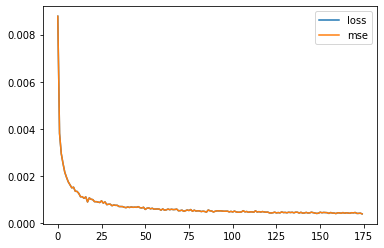

In [245]:
pd.DataFrame(history.history).plot()

In [246]:
test_set_norm = np.array(test_set_norm)
test_set_norm[0:5]

array([0.05186672, 0.04623451, 0.03789129, 0.04160055, 0.04517322])

In [249]:
# creation of test dataset...
x_test_1 = []
for i in range(60, 309) :
  x_test_1.append(test_set_norm[i-60:i])

In [250]:
x_test_1[-1]

array([0.22697994, 0.23512352, 0.24163838, 0.23849654, 0.24909895,
       0.25328107, 0.2566646 , 0.25376444, 0.25645444, 0.25829332,
       0.24884676, 0.25024431, 0.24723906, 0.2298696 , 0.23530215,
       0.24799563, 0.30800593, 0.28300777, 0.28423718, 0.29144556,
       0.28898673, 0.29438776, 0.29641577, 0.29727742, 0.3070287 ,
       0.29461893, 0.2901531 , 0.29237025, 0.2856032 , 0.28279761,
       0.29554362, 0.29474503, 0.28182038, 0.29410405, 0.2994    ,
       0.30427564, 0.31790432, 0.32521778, 0.30290962, 0.28753665,
       0.28028623, 0.27408661, 0.27969779, 0.28274507, 0.2925594 ,
       0.30044028, 0.29999895, 0.30682905, 0.29945254, 0.31164164,
       0.32022655, 0.33203737, 0.33045068, 0.32652075, 0.32261183,
       0.31651728, 0.31351204, 0.31289207, 0.30928788, 0.30215306])

In [251]:
# reshaping to feed into the model
x_test_1 = tf.reshape(x_test_1, shape = (249, 60, 1))

In [252]:
y_preds = model_1.predict(x_test_1)

In [253]:
len(y_preds)

249

In [169]:
test_set = test_set.reset_index(drop = True)

In [234]:
len(y_val)

189

In [254]:
len(test_set_norm)

308

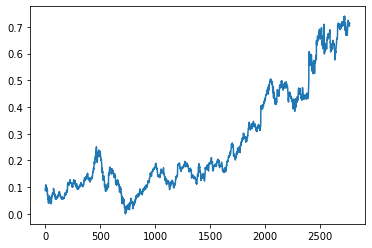

In [257]:
plt.plot(training_set_norm)

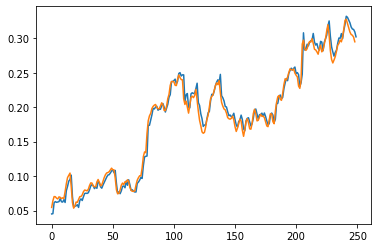

In [256]:
plt.plot(test_set_norm[58:])
plt.plot(y_preds)